In [39]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
from matplotlib import pyplot as plt
import sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

## Preparación de datos

In [40]:
data = pd.read_csv('car_data.csv')

In [41]:
# ajustamos a un mejor formato
columns_dict = {"DateCrawled": "datecrawled", "Price": "price", "VehicleType": "vehicletype", "RegistrationYear": "registrationyear", "Gearbox": "gearbox", "Power": "power", "Model": "model", "Mileage": "mileage", "RegistrationMonth": "registrationmonth", "FuelType": "fueltype", "Brand": "brand", "NotRepaired": "notrepaired", "DateCreated": "datecreated", "NumberOfPictures": "numberofpictures", "PostalCode": "postalcode", "LastSeen": "lastseen"}
data = data.rename(columns = columns_dict)

In [42]:
data.sample(5)

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
351500,09/03/2016 18:43,17500,bus,2007,manual,128,transporter,125000,4,NaN,volkswagen,no,09/03/2016 00:00,0,99425,10/03/2016 14:45
29864,14/03/2016 21:41,1100,sedan,2001,manual,109,3_reihe,150000,10,petrol,peugeot,yes,14/03/2016 00:00,0,78532,19/03/2016 11:16
24066,28/03/2016 15:58,3500,small,2008,manual,60,polo,100000,6,petrol,volkswagen,no,28/03/2016 00:00,0,19406,06/04/2016 21:44
18966,31/03/2016 15:50,3490,sedan,2001,auto,197,s_klasse,150000,12,gasoline,mercedes_benz,no,31/03/2016 00:00,0,37308,06/04/2016 09:44
164807,11/03/2016 19:57,4900,wagon,2008,manual,115,astra,125000,9,petrol,opel,yes,11/03/2016 00:00,0,9326,16/03/2016 09:15


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        354369 non-null  object
 1   price              354369 non-null  int64 
 2   vehicletype        316879 non-null  object
 3   registrationyear   354369 non-null  int64 
 4   gearbox            334536 non-null  object
 5   power              354369 non-null  int64 
 6   model              334664 non-null  object
 7   mileage            354369 non-null  int64 
 8   registrationmonth  354369 non-null  int64 
 9   fueltype           321474 non-null  object
 10  brand              354369 non-null  object
 11  notrepaired        283215 non-null  object
 12  datecreated        354369 non-null  object
 13  numberofpictures   354369 non-null  int64 
 14  postalcode         354369 non-null  int64 
 15  lastseen           354369 non-null  object
dtypes: int64(7), object(

In [44]:
data.describe()

,price,registrationyear,power,mileage,registrationmonth,numberofpictures,postalcode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


1. Price (Precio):
  - Media (mean): 4416.66
  - Desviación estándar (std): 4514.16
  - Mínimo (min): 0
  - Máximo (max): 20,000
  
Observaciones:

   - El precio tiene una gran variabilidad, con valores que van desde 0 hasta 20,000. El hecho de que el valor mínimo sea 0 podría indicar errores en los datos (por ejemplo, coches con precio no definido) o vehículos extremadamente baratos.
   - La diferencia entre la media y el máximo sugiere que existen precios muy altos que están alejados de la mayoría de los datos.

2. RegistrationYear (Año de matriculación)
 - Media (mean): 2004.23
 - Desviación estándar (std): 90.23
 - Mínimo (min): 1000 (posiblemente un error)
 - Máximo (max): 9999 (posiblemente un error)


   Observaciones:

   - Los valores "1000" y "9999" son claramente incorrectos o errores en los datos. Un año de matriculación debe estar entre valores razonables (por ejemplo, entre 1900 y 2020).

   - La media de 2004 es razonable, pero la desviación estándar es alta, lo que podría reflejar una gran diversidad en la edad de los vehículos.


3. NumberOfPictures (Número de fotos)

    Todos los valores son 0, lo que sugiere que no se están proporcionando fotos de los vehículos en el conjunto de datos, o que hay un problema con esa columna.


4. Power (Potencia)

    Observaciones:

    El valor mínimo de 0 puede ser un error, ya que no es posible que un vehículo tenga 0 caballos de fuerza.
    La potencia tiene una gran dispersión (desviación estándar alta), lo que puede indicar que existen vehículos   con potencias muy altas o errores en los datos. Además no existe 20 000 cv. Un rango aceptable no pasa de 800 cv en vehiculos especiales.


In [45]:
# Colocamos un rango de años razonable 
data = data[(data['registrationyear']>1990) & (data['registrationyear']<=2020)]

In [46]:
# Eliminamos una columna innecesaria
data = data.drop('numberofpictures',axis=1)

In [47]:
# Veamos cuantos datos tiene potencia 0 o un valor fuera de lo normal 
data['power'].value_counts()

0       36956
75      23536
60      15604
150     14443
101     13220
        ...  
1054        1
851         1
1339        1
375         1
1241        1
Name: power, Length: 698, dtype: int64

In [48]:
data[data['power'] == 0]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,postalcode,lastseen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,70435,07/04/2016 03:16
32,15/03/2016 20:59,245,sedan,1994,NaN,0,golf,150000,2,petrol,volkswagen,no,15/03/2016 00:00,44145,17/03/2016 18:17
37,28/03/2016 17:50,1500,NaN,2016,NaN,0,kangoo,150000,1,gasoline,renault,no,28/03/2016 00:00,46483,30/03/2016 09:18
54,17/03/2016 07:56,4700,wagon,2005,manual,0,signum,150000,0,NaN,opel,no,17/03/2016 00:00,88433,04/04/2016 04:17
55,26/03/2016 10:39,550,wagon,1999,manual,0,astra,150000,8,gasoline,opel,yes,26/03/2016 00:00,56759,01/04/2016 23:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354338,31/03/2016 19:52,180,NaN,1995,NaN,0,NaN,125000,3,petrol,opel,NaN,31/03/2016 00:00,41470,06/04/2016 14:18
354346,07/03/2016 17:06,2600,NaN,2005,auto,0,c_klasse,150000,9,NaN,mercedes_benz,NaN,07/03/2016 00:00,61169,08/03/2016 21:28
354363,27/03/2016 20:36,1150,bus,2000,manual,0,zafira,150000,3,petrol,opel,no,27/03/2016 00:00,26624,29/03/2016 10:17
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,2694,21/03/2016 10:42


Son 32288 entradas de un total de 354369 aprox, que no contiene como dato power (medidos en CV). Represetan < 10% de entradas de nuestros datos, hay que tomar en consideracion que estas entradas van afectar al modelo de ML (siendo este campo relevante para la prediccion).Dada la naturaleza del proyecto que es recomendar el precio del mercado de los vehiculos que suben los usuarios es obvio que estos campos como (potencia) deben ser rellenados con obligatoriedad por lo que en consecuencia para nuestro modelo de ML debemos considerar carros cuyos campos contengan estos datos asi que bajo esta premisa decidiré quitar estos campos. 

In [49]:
# Excluimos estas entradas 
data = data[data['power'] != 0]

<Axes: xlabel='power'>

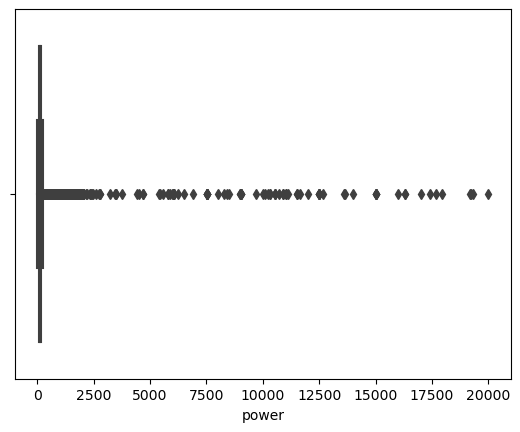

In [50]:
sns.boxplot(x='power', data=data)

In [51]:
Q1 = data['power'].quantile(0.25)
Q3 = data['power'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR  # Umbral inferior
upper_bound = Q3 + 1.5 * IQR  # Umbral superior

print(f"Rango aceptable: {lower_bound} a {upper_bound} CV")

Rango aceptable: -37.5 a 262.5 CV


In [52]:
data[data['power'] > 1000].sample(n=5, random_state=54321)

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,postalcode,lastseen
266811,21/03/2016 18:44,1100,sedan,2001,auto,2792,other,150000,3,lpg,volvo,NaN,21/03/2016 00:00,33102,24/03/2016 08:15
123019,10/03/2016 17:37,950,small,1998,manual,7508,astra,150000,0,NaN,opel,no,10/03/2016 00:00,58730,20/03/2016 02:45
227634,30/03/2016 16:38,15499,wagon,2012,manual,13636,c_klasse,125000,4,gasoline,mercedes_benz,no,30/03/2016 00:00,24983,07/04/2016 07:15
150676,09/03/2016 18:57,1700,wagon,1995,manual,17410,80,5000,0,petrol,audi,yes,09/03/2016 00:00,23562,15/03/2016 07:17
92226,03/04/2016 14:45,950,small,2001,manual,8404,other,125000,7,petrol,suzuki,NaN,03/04/2016 00:00,1594,05/04/2016 13:45


Como vemos no se trata de vehiculos que cuenten con estas caracteristicas por lo que se procede a quitar.

In [53]:
# Eliminamos algunos valores atipicos 
data = data[data['power']<1000]

<Axes: xlabel='power'>

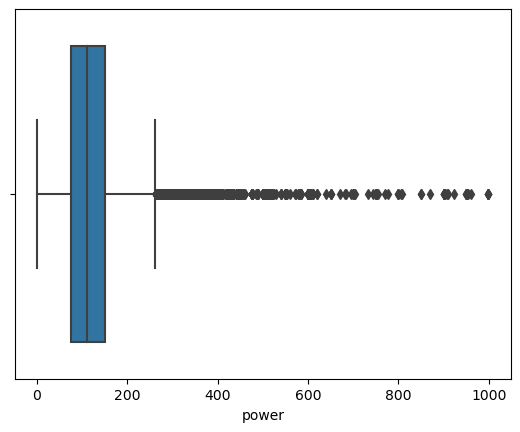

In [54]:
sns.boxplot(x='power', data=data)

In [55]:
data['power'].describe()

count    304545.000000
mean        120.758075
std          54.570656
min           1.000000
25%          75.000000
50%         110.000000
75%         150.000000
max         999.000000
Name: power, dtype: float64

In [56]:
data['power'].value_counts().sort_index()

1       30
2        8
3        7
4       26
5      101
      ... 
952      1
953      1
960      1
998      1
999      4
Name: power, Length: 482, dtype: int64

Por otro lado tener valores muy bajos en potencia (CV / caballos de vapor) no parece corresponder a la realidad, valores como 1,2,3,...,4. Por tanto estableceremos un umbral de 30 cv, lo cual parece razonable. 

In [57]:
data = data[data['power']>30]

Veamos los precios: 

In [58]:
# Numero de entradas cuyos precios indican 0 
data[data['price']== 0].shape[0]

6433

Existe 10000 entradas cuyo precio es cero lo cual nos hace indicar un error dado que no podemos solucionar este problema rellenando con valores como la media o la mediana ya que podria afectar a nuestro modelo ML, la mejor opcion sería excluir estas entradas. 

In [59]:
data = data[data['price']>0]

In [60]:
data['price'].describe()

count    297742.000000
mean       4811.517394
std        4585.245588
min           1.000000
25%        1300.000000
50%        3100.000000
75%        6950.000000
max       20000.000000
Name: price, dtype: float64

Vemos que existen coches de !1 euro!, veamos: 

In [61]:
data_excluida = data[data['price']<1000]
data_excluida.sort_values(by = 'price')

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,postalcode,lastseen
173306,29/03/2016 06:03,1,small,2000,manual,75,polo,150000,0,NaN,volkswagen,NaN,29/03/2016 00:00,6184,05/04/2016 14:47
158359,31/03/2016 22:56,1,wagon,2006,NaN,150,vectra,150000,0,NaN,opel,NaN,31/03/2016 00:00,19294,06/04/2016 20:18
317686,26/03/2016 08:56,1,NaN,2017,manual,131,galaxy,150000,9,gasoline,ford,NaN,26/03/2016 00:00,26553,31/03/2016 02:18
78756,14/03/2016 15:53,1,small,2005,manual,60,other,80000,3,petrol,peugeot,no,14/03/2016 00:00,25474,14/03/2016 15:53
211729,27/03/2016 19:49,1,NaN,2005,manual,55,corsa,150000,2,petrol,opel,yes,27/03/2016 00:00,44793,05/04/2016 18:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174050,02/04/2016 14:58,999,sedan,1996,manual,75,golf,150000,1,petrol,volkswagen,no,02/04/2016 00:00,38889,06/04/2016 13:44
56469,28/03/2016 17:40,999,wagon,1992,manual,133,100,150000,3,petrol,audi,no,28/03/2016 00:00,24879,30/03/2016 08:46
56388,02/04/2016 16:57,999,sedan,1998,auto,170,5er,150000,8,petrol,bmw,yes,02/04/2016 00:00,26180,06/04/2016 16:16
328843,20/03/2016 15:43,999,small,1998,manual,58,clio,150000,10,petrol,renault,no,20/03/2016 00:00,45731,06/04/2016 19:46


Vemos que existen carros que valen 1 euro. Sabemos que esto es imposible, se trata de un error. Se puede explicar que los usuarios no deseen colocar el precio real de su coche en venta y desean mas privacidad en este aspecto para que resulte más negociable, por tanto para nuestro modelo ML estos datos pueden afectar el modelo por tanto lo mejor es separar estas entradas. 

Como segundo punto importante filtramos los carros menores a 1000 euros para observar bien que sean precios acordes a lo publicado por el usuario, vemos que precios que rodan a los 900 euros son coches cuyo modelo son muy antiguos y que por tanto parece ser un precio razonable, ya que tambien cuentan con valores altos de kilometrajes. 

Precios de Autos Matriculados Antes del Año 2000:
  Autos matriculados antes del año 2000 suelen ser vehículos antiguos:
   - Mayor depreciación: Debido a la antigüedad y el desgaste mecánico.
   - Tecnología menos eficiente: No cumplen estándares actuales de emisiones ni cuentan con características modernas.
   
Rango de Precios Razonables:
300 a 1,000 euros: Para autos en condiciones básicas, con alto kilometraje y posibles reparaciones pendientes.

Es importante decir que precios menores a estos podrian tratarse de autos chatarras (autos sin funcionamiento), o errores de usuarios. Para determinar eliminar estos valores veamos las siguientes secciones. 

In [62]:
# Excluimos precios absurdos 
data_excluida = data_excluida[data_excluida['price']>10]
# Mostramos coches menores 100 euros 
data_excluida[data_excluida['price']<100]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,postalcode,lastseen
943,03/04/2016 14:39,98,small,1997,manual,53,swift,150000,7,petrol,suzuki,no,03/04/2016 00:00,14542,05/04/2016 13:18
2702,21/03/2016 02:37,80,small,2001,manual,98,rio,150000,2,petrol,kia,NaN,21/03/2016 00:00,39240,22/03/2016 12:17
3071,24/03/2016 19:57,30,sedan,1995,manual,75,polo,150000,0,petrol,volkswagen,no,24/03/2016 00:00,59067,05/04/2016 13:16
3460,04/04/2016 19:41,99,wagon,1999,manual,90,3_reihe,150000,1,NaN,peugeot,NaN,04/04/2016 00:00,31039,06/04/2016 21:45
3553,10/03/2016 17:37,75,small,1997,manual,45,corsa,150000,6,petrol,opel,NaN,10/03/2016 00:00,87772,12/03/2016 07:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348228,30/03/2016 12:50,90,small,1997,manual,60,NaN,150000,0,petrol,opel,yes,30/03/2016 00:00,95145,30/03/2016 12:50
348813,12/03/2016 09:58,70,small,1998,manual,80,NaN,150000,0,petrol,kia,no,12/03/2016 00:00,26506,29/03/2016 15:15
353015,26/03/2016 12:37,30,NaN,2016,manual,75,golf,150000,10,petrol,volkswagen,yes,26/03/2016 00:00,84048,05/04/2016 23:46
353673,24/03/2016 11:55,90,small,1998,manual,60,other,150000,8,petrol,citroen,yes,24/03/2016 00:00,55278,27/03/2016 08:16


Nos encontramos con verios elementos cuyos años son actuales y con precios absurdos por lo que podria tratarse de erres de los mismos usuarios. Sim embargo al establecer este umbral de 100 euros tambien podriamos tener datos de posibles autos que esten inservibles y se esten vendiendo como chatarra simplemente (es decir no funcionales). Dado que la app nos queremos centrar en venta de autos que funciones y que muestren una cotizacion adecuada, excluir estas entradas es razonable para nuestro modelo de ML.

<Axes: ylabel='Frequency'>

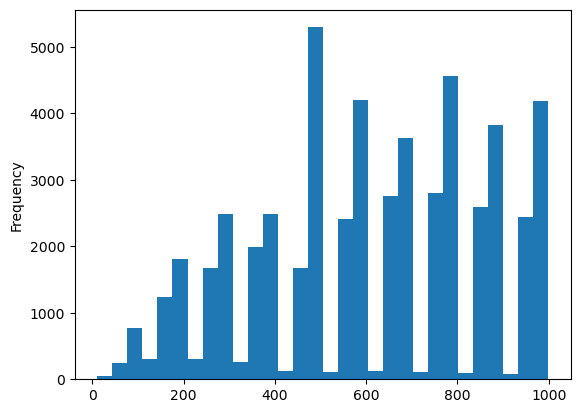

In [63]:
data_excluida['price'].plot(kind='hist',bins = 30)

Vemos tambien que a partir de los 200 euros encontramos mayores frecuencias de autos, entonces seria desde una perspectiva de cubrir mayor cantidad de usuarios que deseen vender vehiculos ya antiguos seria una buena opción escoger el umbral en este punto. Decidí escoger el umbral de 100 euros para no eliminar tantas entradas y cuyo proposito también poder excluir valores absurdos para carros más actuales.

In [64]:
# eliminamos de nuestros datos estos valores 
data = data[data['price']>100]

<Axes: ylabel='Frequency'>

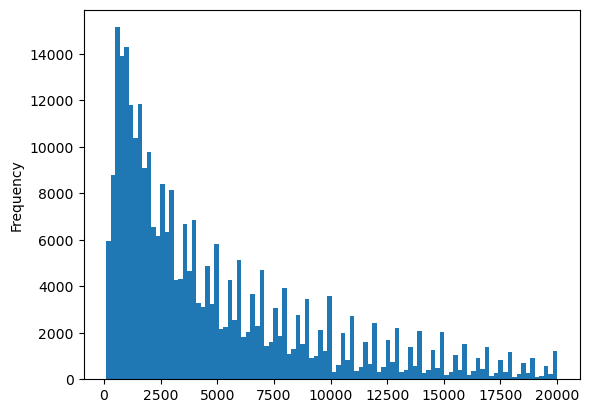

In [65]:
data['price'].plot(kind='hist',bins = 100)

Vemos una distribución con una clara asimetria positiva, y con muchos valores atipicos (outiliters).Esta distribución se debe a que existen coches de segunda con precios muy bajos, asi como coches que pueden haber tenido poco tiempo de uso o poco kilometraje y un año de registro más actual. 

Ahora para la parte de entrenamiento, es necesario quitar las columnas innecesarias que no ayudaran a nuestra prediccion: 

In [66]:
data = data[['price','vehicletype','registrationyear','gearbox','power','model','mileage','fueltype','brand','notrepaired']]

In [67]:
data.head(10)

,price,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
8,14500,bus,2014,manual,125,c_max,30000,petrol,ford,NaN
9,999,small,1998,manual,101,golf,150000,NaN,volkswagen,NaN
10,2000,sedan,2004,manual,105,3_reihe,150000,petrol,mazda,no
11,2799,wagon,2005,manual,140,passat,150000,gasoline,volkswagen,yes


In [68]:
# Analizando valores faltantes 
data.isna().sum()

price                   0
vehicletype         20404
registrationyear        0
gearbox              5603
power                   0
model               11063
mileage                 0
fueltype            18631
brand                   0
notrepaired         44383
dtype: int64

In [69]:
# Rellenamos con desconocido
data.fillna('Desconocido',inplace = True)

In [70]:
data.dtypes

price                int64
vehicletype         object
registrationyear     int64
gearbox             object
power                int64
model               object
mileage              int64
fueltype            object
brand               object
notrepaired         object
dtype: object

In [71]:
# Revisamos las columnas categoricas 
columnas_categoricas = list(data.dtypes[data.dtypes == 'object'].index)
for categoria in columnas_categoricas:
    print(data[categoria].value_counts())
    print()
    print()

sedan          79276
small          68283
wagon          58612
bus            25676
Desconocido    20404
convertible    17751
coupe          13281
suv            10542
other           2169
Name: vehicletype, dtype: int64


manual         232219
auto            58172
Desconocido      5603
Name: gearbox, dtype: int64


golf                  24777
other                 17750
3er                   17261
Desconocido           11063
polo                  10851
                      ...  
rangerover                3
range_rover_evoque        2
serie_2                   1
200                       1
601                       1
Name: model, Length: 249, dtype: int64


petrol         183501
gasoline        88380
Desconocido     18631
lpg              4696
cng               490
hybrid            204
other              54
electric           38
Name: fueltype, dtype: int64


volkswagen        64141
opel              33030
bmw               32203
mercedes_benz     26356
audi              25771
ford 

Observamos que algunas columnas existen varias categorias, por lo que cuando relicemos OHE resultaran muchas columnas,veremos que tal nos resulta. Sino utilizaremos codificacion de etiquetas para las columnas con alta cardinalidad

## Entrenamiento del modelo 

###  Regresion Lineal (prueba de cordura)

Realizaremos una regresion lineal

In [72]:
# Realizamos OHE a la data 
data_ohe = pd.get_dummies(data,drop_first = True)
data_ohe

,price,registrationyear,power,mileage,vehicletype_bus,vehicletype_convertible,vehicletype_coupe,vehicletype_other,vehicletype_sedan,vehicletype_small,...,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notrepaired_no,notrepaired_yes
1,18300,2011,190,125000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9800,2004,163,125000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1500,2001,75,150000,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,3600,2008,69,90000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,650,1995,102,150000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354361,5250,2016,150,150000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
354362,3200,2004,225,150000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
354366,1199,2000,101,125000,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
354367,9200,1996,102,150000,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [73]:
# Separamos el objetivo y las caracteristicas
features = data_ohe.drop('price',axis=1)
target = data_ohe['price']

In [74]:
# Dividimos la prueba en validacion y en entrenamiento 
features_train, features_valid, target_train,target_valid = train_test_split(features,target,test_size = 0.30 , random_state = 54321)

In [75]:
%%time
model = LinearRegression()
model.fit(features_train,target_train)

CPU times: user 23.5 s, sys: 3.33 s, total: 26.8 s
Wall time: 5.94 s


LinearRegression()

Para el proceso de entrenamiento nos tomo alrededor de 8 segundos

In [76]:
%%time
predictions = model.predict(features_valid)
predictions_train = model.predict(features_train)

CPU times: user 1.13 s, sys: 545 ms, total: 1.68 s
Wall time: 854 ms


El tiempo de prediccion del modelo es de 491 ms. Definitivamente el modelo de regresion es muy rapido.

In [77]:
print("MSE con el los datos de entrenamiento: ",mean_squared_error(target_train,predictions_train)** 0.5)
print("MSE con la validacion: ",mean_squared_error(target_valid,predictions)** 0.5)

MSE con el los datos de entrenamiento:  2305.522326064362
MSE con la validacion:  2330.2008246774867


En promedio nuestro modelo se equivoca en 2330 euros, es una cifra algo elevado.Veremos que tal nos resulta con los modelos de gradient boosting y bosque aleatorio.

### Bosque aleatorio de regresion 

Utilizaremos codificacion de etiquetas, la razón principal es que, a diferencia de los modelos de regresión que tienen acceso a todo el espectro de variables al mismo tiempo, el modelo basado en árboles solo puede procesar una variable a la vez.  Como resultado, no tiene información completa sobre la variable categórica original. En cambio, su importancia se dispersa entre muchas variables dummy, por lo que estas variables dummy casi nunca se eligen como variables de división cerca de la raíz del árbol, incluso si fueran un buen predictor.

In [78]:
data

,price,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
1,18300,coupe,2011,manual,190,Desconocido,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,Desconocido
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
...,...,...,...,...,...,...,...,...,...,...
354361,5250,Desconocido,2016,auto,150,159,150000,Desconocido,alfa_romeo,no
354362,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


In [79]:
encoder = OrdinalEncoder()
data_ordinal = data.copy()
data_ordinal[columnas_categoricas] = encoder.fit_transform(data[columnas_categoricas])

In [80]:
data_ordinal

,price,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
1,18300,3.0,2011,2.0,190,26.0,125000,3.0,1.0,2.0
2,9800,7.0,2004,1.0,163,118.0,125000,3.0,14.0,0.0
3,1500,6.0,2001,2.0,75,117.0,150000,7.0,38.0,1.0
4,3600,6.0,2008,2.0,69,102.0,90000,3.0,31.0,1.0
5,650,5.0,1995,2.0,102,11.0,150000,7.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
354361,5250,0.0,2016,1.0,150,4.0,150000,0.0,0.0,1.0
354362,3200,5.0,2004,2.0,225,141.0,150000,7.0,30.0,2.0
354366,1199,2.0,2000,1.0,101,107.0,125000,7.0,32.0,1.0
354367,9200,1.0,1996,2.0,102,223.0,150000,3.0,38.0,1.0


Ahora separamos el objetivo. Separamos los datos en entranamiento y validacion: 70:30.

In [81]:
features = data_ordinal.drop('price',axis = 1)
target = data_ordinal['price']
features_train, features_valid, target_train,target_valid = train_test_split(features,target,test_size = 0.30 , random_state = 54321)

**Atencion** : La siguiente celda demanda bastante tiempo, por lo que se recomienda omitirla ya que la siguiente a esta contiene la mejor seleccion de hiperparametros.Para fines explicativos realizamos la siguiente iteracion para escoger los mejores hiperparametros para el bosque aleatorio de regresion.

In [82]:
%%time
best_error = float('inf')  # Inicializa con un valor de error muy alto
best_depth = None  # Inicializa para llevar un seguimiento de la mejor profundidad

for depth in range(10, 25): 
    model = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=54321)  
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    error = mean_squared_error(target_valid, predictions) ** 0.5  # Calcular RMSE
    if error < best_error: 
        best_depth = depth
        best_error = error

print(f"Mejor profundidad: {best_depth} con RMSE: {best_error}")

Mejor profundidad: 19 con RMSE: 1514.5111116435596
CPU times: user 8min 58s, sys: 2.16 s, total: 9min
Wall time: 9min


Es notorio que para entrenar al modelo y escoger los mejores hiperparametros demanda bastante tiempo esto puede debersa a la cantidad de datos que tenemos.

**ANALISIS DEL MEJOR MODELO DE BOSQUE ALEATORIO DE REGRESION (MEJORES HIPERPARAMETROS)** 

In [83]:
%%time
# Ahora solo seleccionamos el mejor modelo con los mejores hiperparametros. 
model = RandomForestRegressor(n_estimators=100, max_depth=19, random_state=54321)  
model.fit(features_train, target_train)

CPU times: user 37.5 s, sys: 203 ms, total: 37.7 s
Wall time: 37.7 s


RandomForestRegressor(max_depth=19, random_state=54321)

33 segundos para el entrenamiento del mejor modelo. 

In [84]:
%%time
predictions = model.predict(features_valid)  # prediccion para los datos de validacion 

CPU times: user 2.14 s, sys: 3.99 ms, total: 2.14 s
Wall time: 2.15 s


2 segundos para los datos de validacion, como observacion demora más que la regresión

In [85]:
%%time
predictions_train = model.predict(features_train)

CPU times: user 5.38 s, sys: 2 ms, total: 5.38 s
Wall time: 5.38 s


4 segundos para los datos de entrenamiento.

In [86]:
error_valid = mean_squared_error(target_valid, predictions) ** 0.5
error_train = mean_squared_error(target_train, predictions_train) ** 0.5
print("RMSE con el los datos de entrenamiento: ", error_train)
print("RMSE con la validacion: ", error_valid)

RMSE con el los datos de entrenamiento:  1003.3036829189798
RMSE con la validacion:  1514.5111116435596


El mejor modelo tiene un error de 1,515 euros. Es decir, nuestro modelo presenta un margen de error de ±1,515 euros al predecir el valor de nuestro coche en el mercado. Aunque este margen sigue siendo algo elevado, es bastante aceptable. No es tan rápido como una regresión, pero obtenemos mejores resultados en términos de menor error de predicción. Recordemos que un menor error en las predicciones hará que nuestros usuarios estén más satisfechos, lo que podría atraer a nuevos clientes.

### Implementacion de gradient Boosting con LightGBM

Antes de eso deseo esclarecer algunos de los hiperparametros que encontramos en LightGBM. 

 **Resumen visual de los hiperparámetros comunes**

| Hiperparámetro          | Rol principal                         | Valores típicos   |
|-------------------------|---------------------------------------|-------------------|
| `objective`             | Define la tarea                      | `'regression'`, `'binary'`, `'multiclass'` |
| `learning_rate`         | Velocidad de aprendizaje             | 0.01 - 0.1        |
| `n_estimators`          | Número de árboles                   | 50 - 1000         |
| `num_leaves`            | Complejidad de los árboles           | 15 - 64           |
| `max_depth`             | Profundidad máxima de los árboles    | 3 - 16 (o `-1`)   |
| `feature_fraction`      | Subconjunto de características       | 0.6 - 1.0         |
| `bagging_fraction`      | Subconjunto de datos                 | 0.6 - 1.0         |
| `bagging_freq`          | Frecuencia de bagging                | 1 - 10            |
| `lambda_l1`, `lambda_l2`| Regularización                      | 0.0 - 10.0        |
| `min_data_in_leaf`      | Mínimos datos por hoja               | 10 - 100          |

In [87]:
data

,price,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
1,18300,coupe,2011,manual,190,Desconocido,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,Desconocido
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
...,...,...,...,...,...,...,...,...,...,...
354361,5250,Desconocido,2016,auto,150,159,150000,Desconocido,alfa_romeo,no
354362,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


Para los siguientes pasos, es importante aclarar que LightGBM admite datos categóricos, pero estos deben ser explícitamente del tipo de dato 'category' en pandas. Por lo tanto, aquellos que actualmente sean de tipo 'object' serán convertidos a 'category'. Además, es relevante mencionar que no realizaremos ningún tipo de codificación, como One-Hot Encoding (OHE) o codificación ordinal por lo que se dijo.

In [88]:
for col in columnas_categoricas:
    data[col] = data[col].astype('category')

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295994 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   price             295994 non-null  int64   
 1   vehicletype       295994 non-null  category
 2   registrationyear  295994 non-null  int64   
 3   gearbox           295994 non-null  category
 4   power             295994 non-null  int64   
 5   model             295994 non-null  category
 6   mileage           295994 non-null  int64   
 7   fueltype          295994 non-null  category
 8   brand             295994 non-null  category
 9   notrepaired       295994 non-null  category
dtypes: category(6), int64(4)
memory usage: 13.3 MB


In [90]:
features = data.drop('price',axis = 1)
target = data['price']

Dividiremos los datos en tres conjuntos importantes: entrenamiento, validación y prueba, siguiendo una proporción de 70:20:10.

Es relevante destacar que hemos seleccionado el 70% de los datos para el entrenamiento. El tiempo que tome entrenar el modelo será comparado con el del modelo anterior, ya que ambos utilizarán conjuntos de entrenamiento del mismo tamaño, lo que permitirá realizar una comparación justa.

In [91]:
# División inicial: 70% entrenamiento, 30% temporal (validación + prueba)
features_train, X_temp, target_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)

# División secundaria: 20% validación, 10% prueba de los datos originales
features_val, features_test, target_val, target_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)  # 0.33 * 30% ≈ 10%


In [97]:
%%time
# Modelo con profundidad limitada
model = lgb.LGBMRegressor(
    max_depth=7,          # Árboles con profundidad máxima de 7
    num_leaves=50,        # Máximo 50 hojas por árbol
    n_estimators=1000,    # Número de árboles
    learning_rate=0.1,    # Tasa de aprendizaje
    metric='rmse'         # Métrica para evaluación
)

# Entrenar el modelo
model.fit(features_train, target_train, eval_set=[(features_val, target_val)])


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 207195, number of used features: 9
[LightGBM] [Info] Start training from score 4856.870639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(max_depth=7, metric='rmse', n_estimators=1000, num_leaves=50)

Marca un tiempo de 20 segundos para cuestiones de entrenamiento

In [98]:
%%time
predictions_test = model.predict(features_test) #predicciones test
error_test = mean_squared_error(target_test, predictions_test) ** 0.5

CPU times: user 2.95 s, sys: 17 ms, total: 2.97 s
Wall time: 377 ms


Para el test que es un cojunto de datos más pequeño demoramos 2 segundos 

In [99]:
%%time
predictions_val = model.predict(features_val) #predicciones para validacion
error_val = mean_squared_error(target_val, predictions_val) ** 0.5

CPU times: user 5.55 s, sys: 4.06 ms, total: 5.55 s
Wall time: 700 ms


6 Segundos para los datos de validacion

In [100]:
%%time
predictions_train = model.predict(features_train) # predicciones del entrenamiento
error_train = mean_squared_error(target_train, predictions_train) ** 0.5

CPU times: user 19.4 s, sys: 20.9 ms, total: 19.4 s
Wall time: 2.45 s


20 segundos para los datos de entrenamiento.  // 4 segundos en el bosque de regresion

In [101]:
print("RMSE con el los datos de entrenamiento: ", error_train)
print("RMSE con la validacion: ", error_val)
print("RMSE con el los datos de prueba: ", error_test)

RMSE con el los datos de entrenamiento:  1277.4025733976723
RMSE con la validacion:  1436.3506275494667
RMSE con el los datos de prueba:  1457.4485083524185


Hemos obtenido una mejor predicción, pero, por otro lado, para el conjunto de entrenamiento (se realiza esta comparación porque ambos modelos utilizan la misma cantidad de datos), el tiempo de entrenamiento es considerablemente mayor. También es importante destacar que el RMSE en el conjunto de entrenamiento es más bajo que en los conjuntos de validación y prueba, lo que podría indicar que el modelo está ligeramente sobreajustado. Basándonos en esto, reduciremos la profundidad y el número de hojas del modelo para ver si podemos mejorar el RMSE.

Relación entre max_depth y num_leaves
LightGBM tiene otro hiperparámetro llamado num_leaves, que controla el número máximo de hojas en un árbol. Ambos están relacionados:

Número de hojas máximo en un árbol está dado por  $2^{\text{max\_depth}} - 1$. Si no configuras num_leaves, LightGBM puede sobreajustar si el valor predeterminado es demasiado alto para la profundidad elegida.

In [103]:
%%time
# Modelo con profundidad limitada
model = lgb.LGBMRegressor(
    max_depth=5,          # Árboles con profundidad máxima de 7
    num_leaves=31,        # Máximo 31 hojas por árbol
    n_estimators=1100,    # Número de árboles
    learning_rate=0.1,    # Tasa de aprendizaje
    metric='rmse'         # Métrica para evaluación
)

# Entrenar el modelo
model.fit(features_train, target_train, eval_set=[(features_val, target_val)])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 207195, number of used features: 9
[LightGBM] [Info] Start training from score 4856.870639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(max_depth=5, metric='rmse', n_estimators=1100)

In [104]:
%%time
predictions_test = model.predict(features_test) #predicciones test
error_test = mean_squared_error(target_test, predictions_test) ** 0.5

CPU times: user 2.84 s, sys: 22 ms, total: 2.86 s
Wall time: 363 ms


In [105]:
%%time
predictions_val = model.predict(features_val) #predicciones para validacion
error_val = mean_squared_error(target_val, predictions_val) ** 0.5

CPU times: user 5.76 s, sys: 20 ms, total: 5.78 s
Wall time: 728 ms


In [106]:
%%time
predictions_train = model.predict(features_train) # predicciones del entrenamiento
error_train = mean_squared_error(target_train, predictions_train) ** 0.5

CPU times: user 19.1 s, sys: 8 ms, total: 19.2 s
Wall time: 2.41 s


21 segundos para los datos de entrenamiento

In [107]:
print("RMSE con el los datos de entrenamiento: ", error_train)
print("RMSE con la validacion: ", error_val)
print("RMSE con el los datos de prueba: ", error_test)

RMSE con el los datos de entrenamiento:  1352.395774658234
RMSE con la validacion:  1454.181230099718
RMSE con el los datos de prueba:  1479.7863501310076


No logramos mejorar el RMSE,respecto la anterior configuracion de hiperparametros 

**Conclusiones y observaciones**
 - En términos de velocidad, la regresión muestra una altísima velocidad de predicción, ya que requiere menos esfuerzo computacional. Además, nos sirve como umbral para modelos más complejos, como el bosque de regresión y el bosque aleatorio de regresión, por lo que es un buen punto de partida para identificar posibles errores.

 - Si nos enfocamos en el entrenamiento de los modelos, la regresión sigue siendo el más rápido. Sin embargo, observamos que el entrenamiento con Gradient Boosting toma mucho menos tiempo, tal vez debido a la optimización del modelo. Cabe recalcar que, sin considerar el tiempo que nos toma la mejor selección de hiperparámetros para el bosque de regresión (alrededor de 7 minutos), aún así Gradient Boosting es más rápido en el proceso de entrenamiento.

Nuestro objetivo principal en este proyecto es la atracción de nuevos usuarios a nuestra aplicación. En este sentido, lo que buscamos es que los usuarios puedan obtener una cotización de su coche a precio de mercado, por lo que necesitamos predecir con el menor error posible y en el menor tiempo posible. Dado que se trata de una aplicación, la mayoría de los usuarios no desea esperar mucho.

Es importante señalar que, en un entorno de producción, el tiempo de entrenamiento no es tan relevante, ya que lo que más nos importa es el tiempo de predicción. En este caso, el tiempo de predicción entre el bosque de regresión y Gradient Boosting no es muy distinto si estamos tratando con una sola entrada. Si nuestro objetivo es minimizar el error lo máximo posible, Gradient Boosting representa una excelente opción. Si necesitamos hacer entrenamientos constantes, también es una buena opción, ya que sabemos que el mercado se actualiza constantemente.

Recordemos que el umbral establecido en la regresión es de 2,330 euros. Logramos reducir este error a 1,515 euros para el bosque de regresión y 1,457 euros para Gradient Boosting. Si apreciamos no equivocarnos en la predicción, Gradient Boosting es la mejor opción en términos de tiempo y error.